# Huffman Coding

**Huffman Coding is a technique of compressing data to reduce its size without losing any of the details. It was first developed by David Huffman.
Huffman Coding is generally useful to compress the data in which there are frequently occurring characters.**

## How Huffman Coding works?

**Suppose the string below is to be sent over a network.**

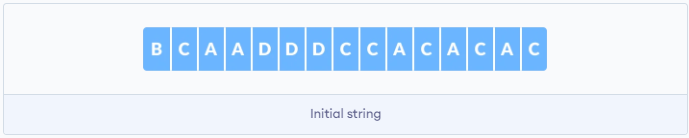

**Each character occupies `8 bits`. There are a total of 15 characters in the above string. Thus, a total of `8 * 15 = 120` bits are required to send this string.
Using the Huffman Coding technique, we can compress the string to a smaller size.
Huffman coding first creates a tree using the frequencies of the character and then generates code for each character.
Once the data is encoded, it has to be decoded. Decoding is done using the same tree.**

**Huffman Coding prevents any ambiguity in the decoding process using the concept of prefix code ie. a code associated with a character should not be present in the prefix of any other code. The tree created above helps in maintaining the property.**


## Example of Huffman's algorithm

**1. Calculate the frequency of each character in the string.**

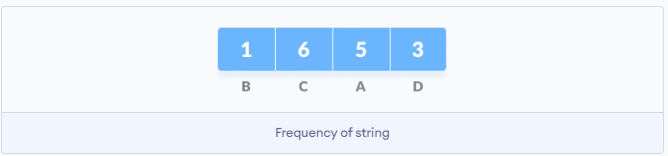

**2. Sort the characters in increasing order of the frequency. These are stored in a priority queue `Q`.**

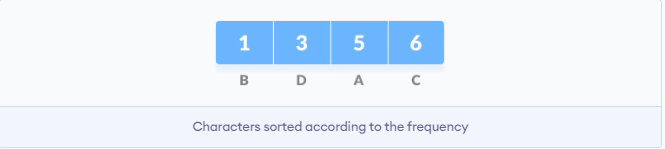

**3. Make each unique character as a leaf node.**

**4. Create an empty node `z`. Assign the minimum frequency to the left child of `z` and assign the second minimum frequency to the right child of `z`. Set the value of the `z` as the sum of the above two minimum frequencies.**

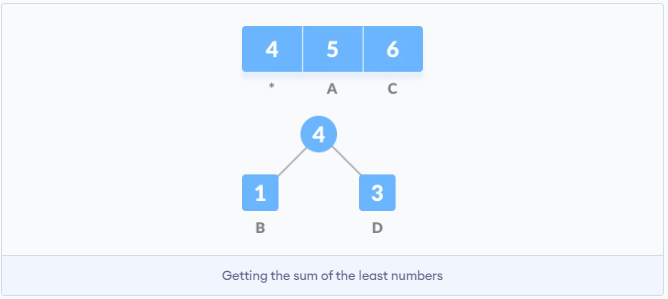

**5. Remove these two minimum frequencies from `Q` and add the sum into the list of frequencies (* denote the internal nodes in the figure above).**

**6. Insert node `z` into the tree.**

**7. Repeat steps `3` to `5` for all the characters.**

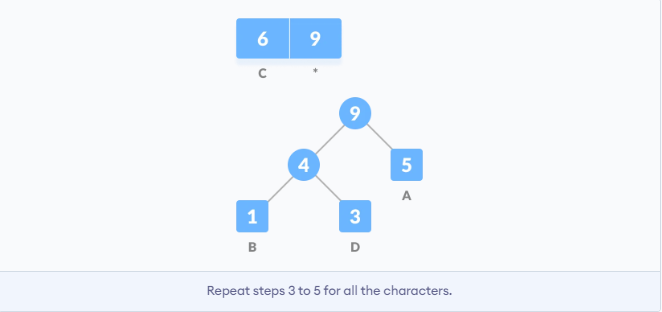

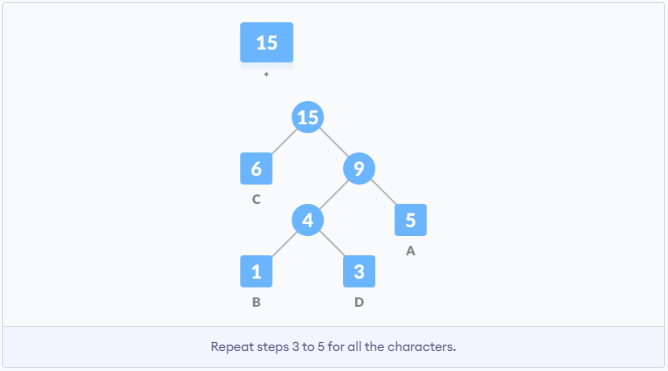

**8. For each non-leaf node, assign `0` to the left edge and `1` to the right edge.**

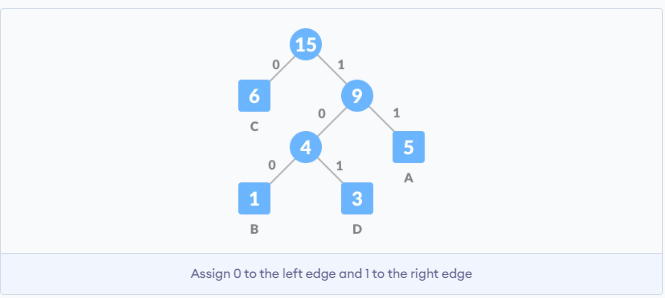

**For sending the above string over a network, we have to send the tree as well as the above compressed-code. The total size is given by the table below.**

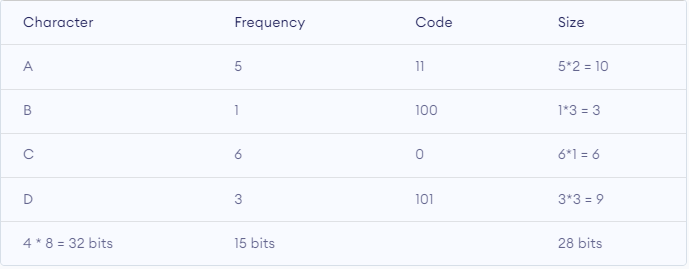

**Without encoding, the total size of the string was `120 bits`. After encoding the size is reduced to `32 + 15 + 28 = 75`.**



## Decoding the code

**For decoding the code, we can take the code and traverse through the tree to find the character.
Let 101 is to be decoded, we can traverse from the root as in the figure below.**

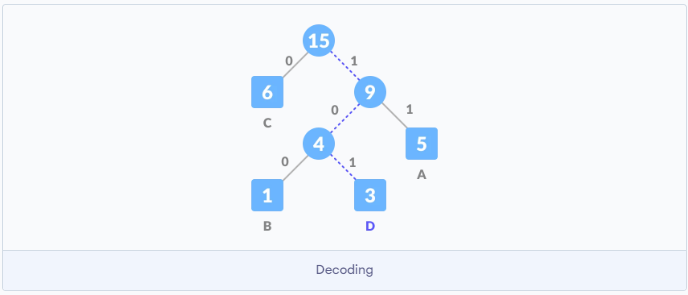

## Huffman Coding pseudocode

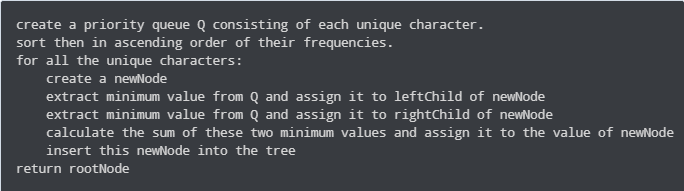

In [1]:
# Huffman Coding in python

string = 'BCAADDDCCACACAC'


# Creating tree nodes
class NodeTree(object):

    def __init__(self, left=None, right=None):
        self.left = left
        self.right = right

    def children(self):
        return (self.left, self.right)

    def nodes(self):
        return (self.left, self.right)

    def __str__(self):
        return '%s_%s' % (self.left, self.right)


In [2]:
# Main function implementing huffman coding
def huffman_code_tree(node, left=True, binString=''):
    if type(node) is str:
        return {node: binString}
    (l, r) = node.children()
    d = dict()
    d.update(huffman_code_tree(l, True, binString + '0'))
    d.update(huffman_code_tree(r, False, binString + '1'))
    return d

In [3]:
# Calculating frequency
freq = {}
for c in string:
    if c in freq:
        freq[c] += 1
    else:
        freq[c] = 1

freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)

nodes = freq

while len(nodes) > 1:
    (key1, c1) = nodes[-1]
    (key2, c2) = nodes[-2]
    nodes = nodes[:-2]
    node = NodeTree(key1, key2)
    nodes.append((node, c1 + c2))

    nodes = sorted(nodes, key=lambda x: x[1], reverse=True)

huffmanCode = huffman_code_tree(nodes[0][0])

In [4]:
print(' Char | Huffman code ')
print('----------------------')
for (char, frequency) in freq:
    print(' %-4r |%12s' % (char, huffmanCode[char]))

 Char | Huffman code 
----------------------
 'C'  |           0
 'A'  |          11
 'D'  |         101
 'B'  |         100


## Huffman Coding Complexity

**The time complexity for encoding each unique character based on its frequency is `O(nlog n)`.
Extracting minimum frequency from the priority queue takes place `2*(n-1)` times and its complexity is `O(log n)`. Thus the overall complexity is `O(nlog n)`.**

## Huffman Coding Applications
* Huffman coding is used in conventional compression formats like GZIP, BZIP2, PKZIP, etc.
* For text and fax transmissions.